# IRIS  Prediction

## EDA

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.metrics import accuracy_score as score
from sklearn.svm import SVC

In [2]:
# Read Dataset
train = pd.read_csv('IRIS.csv')
train.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Understand of Data

In [3]:
# see information about Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# see shape of Data
train.shape

(150, 5)

In [5]:
# see columns names
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# some status
round(train.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0
std,1.0,0.0,2.0,1.0
min,4.0,2.0,1.0,0.0
25%,5.0,3.0,2.0,0.0
50%,6.0,3.0,4.0,1.0
75%,6.0,3.0,5.0,2.0
max,8.0,4.0,7.0,2.0


### Data Cleaning 

In [7]:
# see missing values
train.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
# see missing values
train.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
train['species']=train['species'].str.replace('Iris-','')

### Visualizition of Data

C:\Users\Ameer_Hassan0000\AppData\Local\Temp\ipykernel_16272\2068314326.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<Axes: >

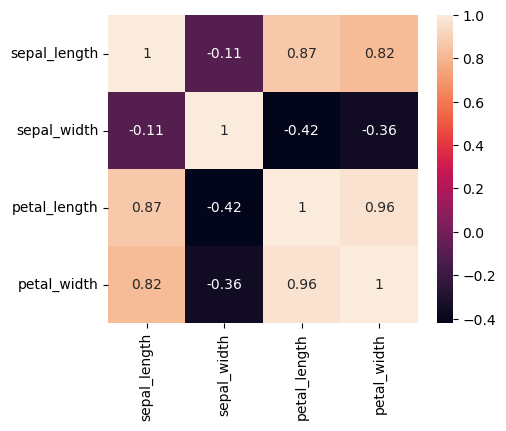

In [10]:
# heatmap
plt.rcParams['figure.figsize'] =(5,4)
sns.heatmap(train.corr(), annot=True)

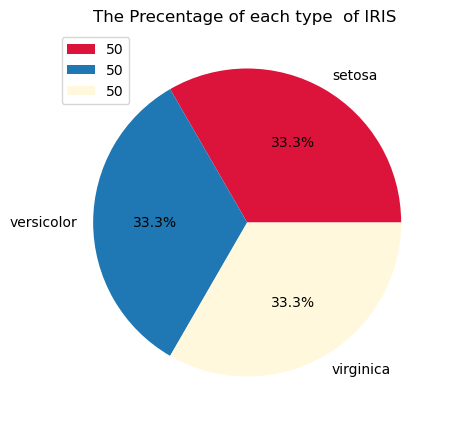

In [11]:
# the precentage of each type  of IRIS 
labels = train.species.unique()
plt.rcParams['figure.figsize']=(10,5)
size = train.species.value_counts()
color =['#DC143C','#1f77b4','#FFF8DC']
plt.pie(labels=labels,x=size,autopct='%1.1f%%',startangle=0,colors=color)
plt.legend(train.species.value_counts(),loc = 'upper left')
plt.title('The Precentage of each type  of IRIS ')
plt.show()

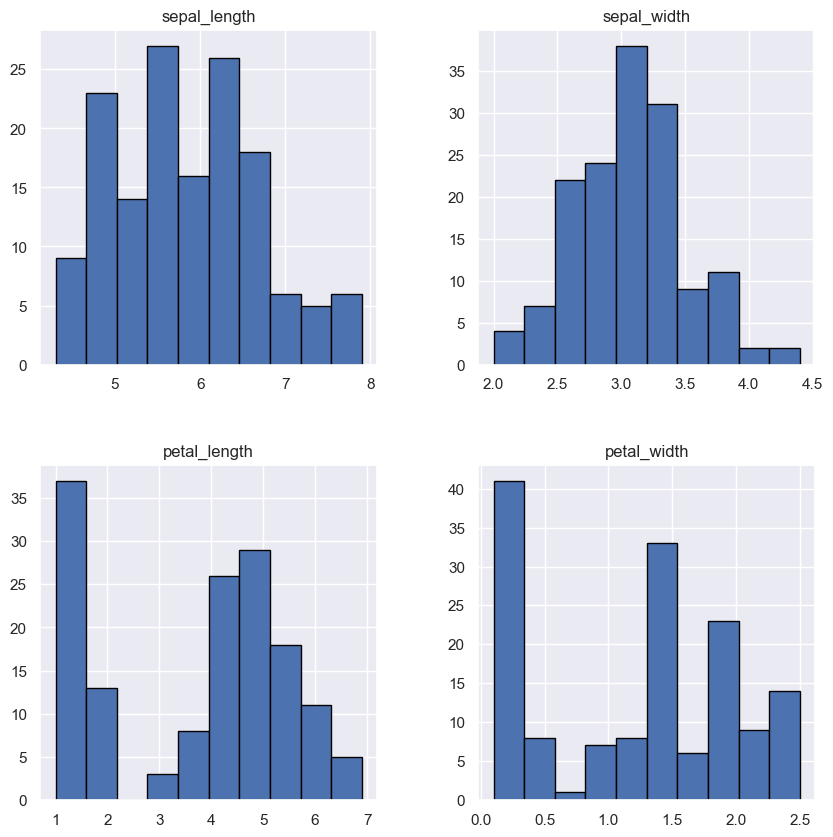

In [12]:
# Histgrams
sns.set_theme()
train.hist(edgecolor='black',figsize=(10,10))
plt.show()

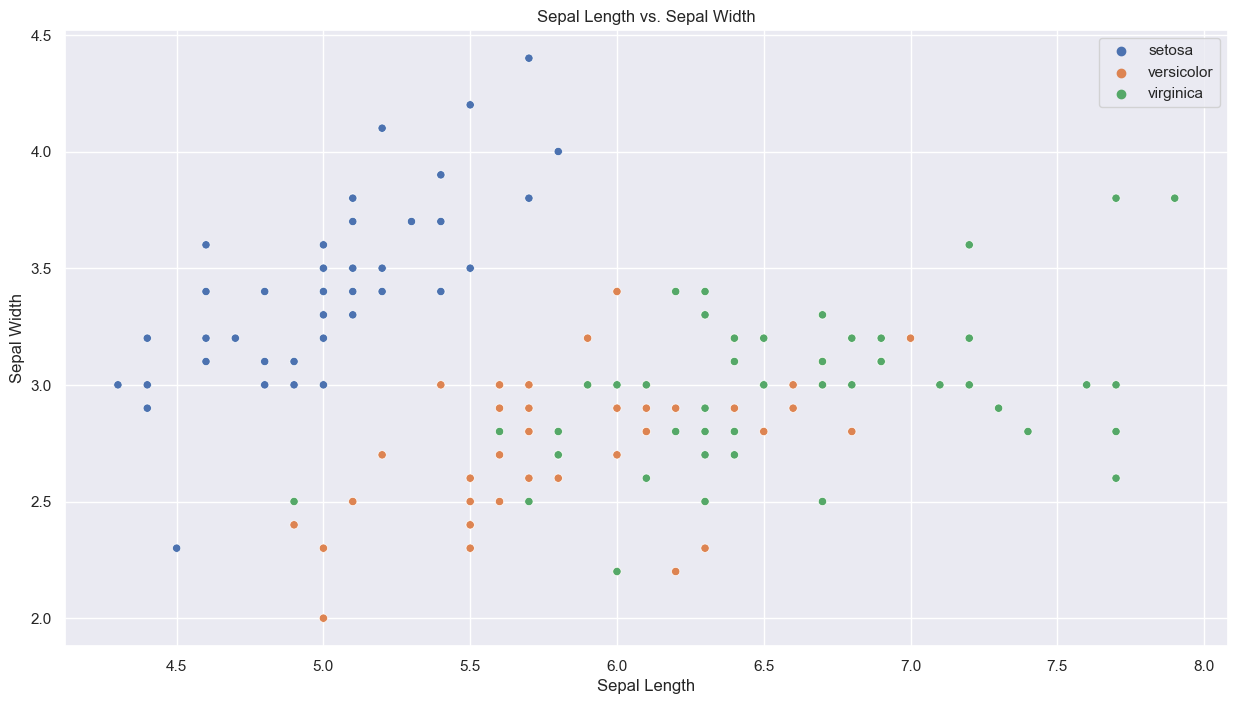

In [13]:
# Sepal Length and Width by IRIS
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper right')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

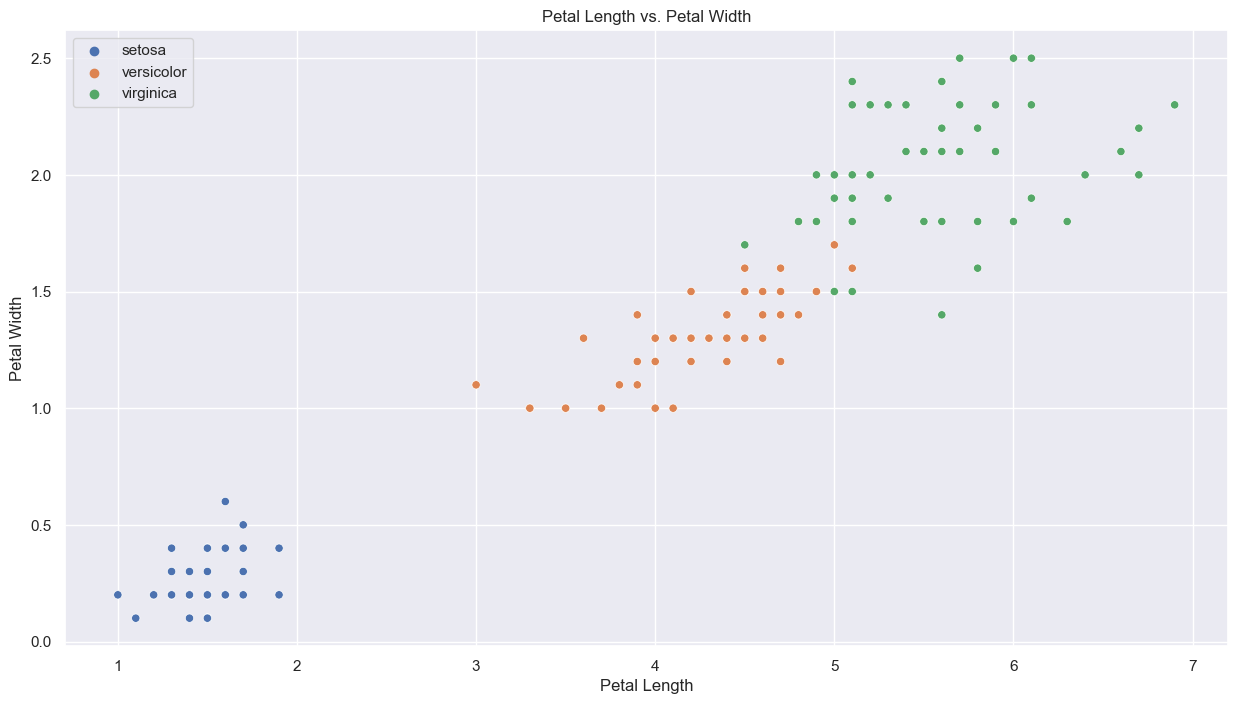

In [14]:
# Petal Length and Width
plt.figure(figsize=(15,8))
sns.scatterplot(data=train, x='petal_length', y='petal_width', hue='species')
plt.legend(loc='upper left')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

## Machine Learing Algorithms

### Split of Data 

In [15]:
x = train.drop('species', axis=1)
y= train['species']
x_train, x_test, y_train, y_test = split(x, y, test_size=0.4, random_state=5)

### Support Vector Machine (SVM)

In [16]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
score = svm.score(x_test, y_test) * 100
print('SVM Accuracy: {:.2f} %'.format(score))

SVM Accuracy: 98.33 %
